In [1]:
%matplotlib inline

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.linalg import norm
os.chdir("../nba/ios/")
from snap_reader import ReadGadgetSim, ReadGC21

In [3]:
snapshot="/home/ngc/Work/research/data/GC21/"
snapname = "MWLMC5_100M_b0_vir_OM3_G4_110.hdf5"


To load the DM particle of the host (by default galaxy=0) we use the load_halo function in nba 

In [4]:
GC21 = ReadGadgetSim(snapshot, snapname)

In [5]:
GC21_data = GC21.read_snapshot(quantity=['pos', 'vel'], ptype='dm')

In [6]:
GC21_header = GC21.read_header()

[INFO] Header 'Time': 2.203125
[INFO] Header 'Redshift': 0.0
[INFO] Header 'BoxSize': 0.0
[INFO] Header 'NumPart_Total': [        0 115000000   5780000   1400000         0]
[INFO] Header 'MassTable': [0. 0. 0. 0. 0.]


In [7]:
GC21_header

{'Time': 2.203125,
 'Redshift': 0.0,
 'BoxSize': 0.0,
 'NumPart_Total': array([        0, 115000000,   5780000,   1400000,         0],
       dtype=uint64),
 'MassTable': array([0., 0., 0., 0., 0.])}

In [8]:
GC21_header['NumPart_Total'][1]

115000000

In [9]:
GC21_data['pos'].shape

(115000000, 3)

In [10]:
del(GC21_data)

In [4]:
GC21_mw = ReadGC21(snapshot, snapname)
GC21_mw_pos = GC21_mw.read_halo('pos', 'LMC')

[INFO] Header 'Time': 2.203125
[INFO] Header 'Redshift': 0.0
[INFO] Header 'BoxSize': 0.0
[INFO] Header 'NumPart_Total': [        0 115000000   5780000   1400000         0]
[INFO] Header 'MassTable': [0. 0. 0. 0. 0.]


In [5]:
GC21_mw_pos['pos'].shape

(15000000, 3)

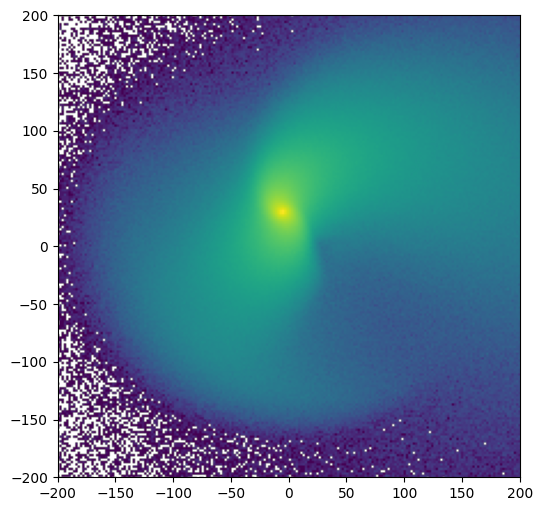

In [6]:
rsat = norm(GC21_mw_pos['pos'], axis=1)
rcut = np.where(rsat<300)[0]

plt.figure(figsize=(6,6))
Hh, xh, yh = np.histogram2d(GC21_mw_pos['pos'][rcut,1], 
                            GC21_mw_pos['pos'][rcut,2], bins=300)
plt.imshow(Hh.T, norm=LogNorm(), extent=[np.min(xh), np.max(xh), np.min(yh), np.max(yh)])
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.show()